# Advanced Regression Algorithms

This notebook explores more advanced regression algorithms beyond Linear Regression, Ridge, and Lasso. We will use the supermarket sales dataset and compare the performance of several sophisticated models.

**Objectives:**
- Introduce advanced regression algorithms
- Compare their performance using standard metrics
- Discuss practical considerations for model selection

In [ ]:
import ipywidgets as widgets
import pandas as pd
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings("ignore")

In [71]:
# Load dataset
file_path = "../../data/SuperMarketAnalysis.csv"
df = pd.read_csv(file_path)

## Data Preparation

We will use the same features as before and apply one-hot encoding to categorical variables.

In [72]:
# Prepare data
# Select features (excluding target and identifiers)
features_to_encode = [
    "Branch",
    "City",
    "Customer type",
    "Gender",
    "Product line",
    "Payment",
]

other_features_to_include = [
    "Unit price",
    "Rating",
]

# Encode categorical variables
df_encoded = pd.concat(
    [
        pd.get_dummies(df[features_to_encode], drop_first=True),
        df[other_features_to_include],
    ],
    axis=1,
)

X = df_encoded
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Why Use Advanced regression models?

### Our Scenario: Supermarket sales prediction

In our previous notebooks, we discovered that **linear models had high MSE on both training and test sets**, indicating **underfitting**. This suggests our supermarket sales data has complex patterns that linear models cannot capture effectively.

### Why linear models fall short:

1. **Non-linear Relationships**: sales might depend on complex interactions between features
   - Example: High-priced items might sell differently across branches
   - Customer type + product line combinations might have unique patterns

2. **Feature Interactions**: real-world sales involve feature combinations
   - Weekend + certain product lines = higher sales
   - Gender + product preferences = complex buying patterns

3. **Complex Business Logic**: supermarket sales involve:
   - Seasonal patterns, customer behavior, location effects
   - Price sensitivity varies by product category
   - Branch-specific customer preferences

Advanced Models can capture:
- **Non-linear patterns** in the data
- **Feature interactions** automatically
- **Complex decision boundaries**
- **Better predictions** for business decision-making

### Why these specific models?

| Model | Why Use for Supermarket Sales | Key Strengths |
|-------|------------------------------|---------------|
| **Random Forest** | Robust ensemble method, good baseline for business data | Handles mixed data types, reduces overfitting, provides feature importance |
| **Gradient Boosting** | Sequential learning captures complex patterns | Excellent predictive performance, handles non-linearity well |
| **XGBoost** | Industry standard for structured data like sales records | Optimized performance, built-in regularization, handles missing values |
| **LightGBM** | Fast training on business datasets | Memory efficient, excellent for categorical features, fast inference |

### Business impact
Better sales predictions help with:
- **Inventory management**: stock the right products
- **Revenue forecasting**: plan budgets and targets
- **Customer insights**: understand buying patterns
- **Branch optimization**: tailor strategies per location

## Advanced Regression Models

Let's explore each model and understand why it's suitable for our supermarket sales prediction:

### 🌳 **[Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)**
- **How it works**: Combines multiple decision trees, each trained on different data subsets
- **Why for sales data**: Excellent at capturing feature interactions (e.g., branch + product line effects)
- **Advantages**: Robust to outliers, provides feature importance, reduces overfitting

### 📈 **[Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)**
- **How it works**: Builds models sequentially, each correcting errors from previous ones
- **Why for sales data**: Learns complex non-linear patterns in customer behavior
- **Advantages**: High predictive accuracy, handles mixed data types well

### ⚡ **[XGBoost (Extreme Gradient Boosting)](https://docs.snowflake.com/en/developer-guide/snowflake-ml/model-registry/built-in-models/xgboost)**
- **How it works**: Optimized gradient boosting with advanced regularization
- **Why for sales data**: Industry standard for structured business data like ours
- **Advantages**: Built-in regularization, handles missing values, excellent performance

### 🚀 **[LightGBM (Light Gradient Boosting Machine)](https://lightgbm.readthedocs.io/en/latest/index.html)**
- **How it works**: Gradient boosting optimized for speed and memory efficiency
- **Why for sales data**: Excels with categorical features (branch, product line, gender)
- **Advantages**: Fast training, memory efficient, great for categorical data

All these models can automatically discover complex patterns that linear regression missed in our supermarket sales data.

In [73]:
# Define and fit models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42, verbose=-1),
    "Linear Regression": LinearRegression(),
}


def fit_and_evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2


results = {name: fit_and_evaluate(model) for name, model in models.items()}

# Display results
results_df = pd.DataFrame(results, index=["MSE", "MAE", "R2"]).T
results_df

,MSE,MAE,R2
Random Forest,39465.625978,150.081680,0.393387
Gradient Boosting,39646.154802,149.472811,0.390612
XGBoost,50969.933401,163.330114,0.216558
LightGBM,43563.971434,159.479649,0.330393
Linear Regression,35744.006721,147.313714,0.450591


## Visual Comparison

Let's visualize the predictions of each model against the actual values.

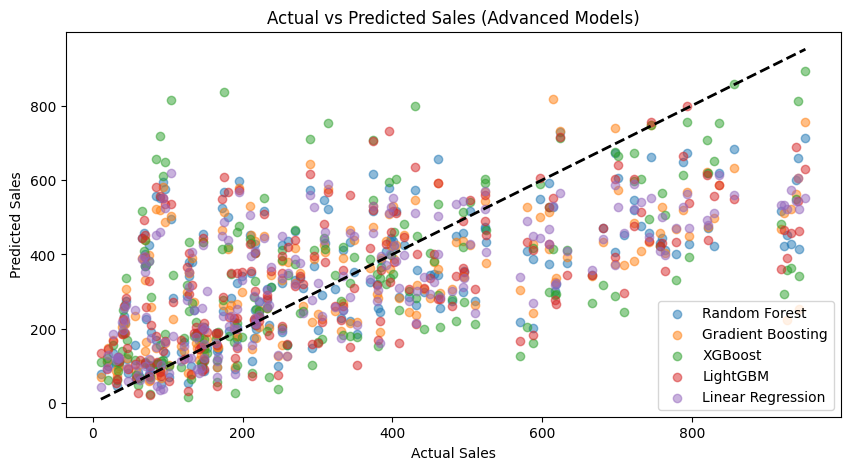

In [ ]:
plt.figure(figsize=(10, 5))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Advanced Models)")
plt.legend()
plt.show()

## Discussion

**<span style="color: green;">QUESTION:</span>** Which model performed best on this dataset?

<details>
        <summary>Answer: Click to show</summary>

It's Linear Regression! This could be due to the specific characteristics of the dataset, such as linear relationships between features and the target variable, or the absence of complex interactions that more advanced models typically capture. Additionally, simpler models like Linear Regression can sometimes outperform more complex models when the dataset is small.

MAE treats all errors equally by averaging the absolute values of the residuals. MSE squares the errors, so it penalizes large errors much more than small ones. R squared measures how well the model explains the variance in the data and is not as sensitive to outliers as the MSE
</details>

**<span style="color: green;">QUESTION:</span>** What could be a next step in understanding further model performances?

<details>
        <summary>Answer: Click to show</summary>
Error analysis are possible next steps after training the model to further optimize it and to understand why it makes mistakes and how to improve it.
</details>

**<span style="color: green;">QUESTION:</span>** What are the trade-offs between model complexity, interpretability, and performance?

<details>
        <summary>Answer: Click to show</summary>
There’s a trade-off between model complexity, interpretability, and performance. Simple models are easier to understand and explain but may underperform on complex tasks, while complex models can capture more patterns but are harder to interpret and risk overfitting. The best choice depends on the problem—some situations demand transparency, while others prioritize predictive accuracy

In our case, the simple model performed best, so there is no tradeoff to be made!
</details>


# Additional Concepts

## Regularization: Ridge and Lasso Regression

Regularization techniques help prevent overfitting by adding a penalty to the regression model. This is especially useful when dealing with many features, our model is overfitting or multicollinearity. 

- **Ridge Regression:** Adds L2 penalty (squared magnitude of coefficients). L2 penalty shrinks the coefficients of the variables, but never makes them zero (disappear completely from the quation). It keeps all features but reduces their influence, spreading effects more evenly.
- **Lasso Regression:** Adds L1 penalty (absolute value of coefficients), can shrink some coefficients to zero (feature selection). L1, on the other hand, pushes some coefficients to zero. It does automatically variable sleection and keeps only the most important independent variables in the final equation. In machine learning we say that L1 does _feature (or variable) selection_

These methods help improve model generalization and are widely used in business analytics and machine learning.

**<span style="color: green;">QUESTION:</span>** What is overfitting?
<details>
        <summary>Answer: Click to show</summary>
Opposite to underfitting, overfitting happens when a model learns not only the true pattern in the trainnig data, but also random fluctuations. As a result, it performs (too) well on the training set but poorly on unseen test data because it fails to generalize.
</details>

**<span style="color: green;">QUESTION:</span>** What is multicollinearity?
<details>
        <summary>Answer: Click to show</summary>
This occurs when two or more independent variables in a regression model are highly correlated with each other. It makes it hard for the model to distinguish their individual effects on the dependent variable, leading to unstable coefficients and unreliable interpretations. In short, predictors overlap too much and confuse the model.
</details>

## Scaling and scikit-learn Pipelines

What is the impact of the scale each feature in the regularisation terms?

The scale of each feature affects the scale of it's coefficient. To get the most out of regularisation terms like L1 and L2, we need to adjust the scale of the data using some sort of transformation.
The most common transformations for regression are: 
* **Standard scaling:** $X_{scaled} = \frac{X - \mu}{\sigma}$ where $\mu$ is the mean and $\sigma$ is the standard deviation
* **MinMax scaling:** $X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$ which scales features to a [0, 1] range.  

It's very important to apply the exact same transformation to the train and the test set.
Since the test set is not known to us in advance, we calculate the min, max, mean, std or any other quantity required for scaling using the
training set only.  

A very effective way to add scaling and other tricks and features in our models and avoid common Data Science pitfalls like target leakage
is to use scikit-learn pipelines.

Depending on the algorithms and the data, you will need to use different scaling transformations or no scaling at all:
* Tree based algorithms don't benefit much from scaling.
* Neural networks require the input data to be scaled.

In [75]:
# Scikit-learn Pipelines with Column Transformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Identify numerical columns to scale (only Unit price)
numerical_features = ["Unit price"]

# Create a ColumnTransformer to scale only Unit price
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), numerical_features)],  # Scale Unit price
    remainder="passthrough",  # Keep categorical and binary columns as they are
)

# Create Ridge pipeline
ridge_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", Ridge(alpha=1.0))]
)

# Create Lasso pipeline, using the util function
lasso_pipeline = make_pipeline(preprocessor, Lasso(alpha=1.0, max_iter=10000))

# show the pipeline graphic interface
display(ridge_pipeline)
display(lasso_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Unit price'])])),
                ('regressor', Ridge())])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Unit price'])])),
                ('lasso', Lasso(max_iter=10000))])

In this exercise, we will play around with the Alpha parameter of Ridge and Lasso regression.

By adjusting the Alpha parameter, we can control the strength of the regularization applied to the model. A higher Alpha value increases the amount of regularization, which can help prevent overfitting but may also lead to underfitting if set too high. Conversely, a lower Alpha value reduces the regularization effect, allowing the model to fit the training data more closely, but potentially at the cost of generalization to new data.

In practice, we can use techniques like cross-validation to find the optimal Alpha value that balances bias and variance, leading to better model performance on unseen data.

In [82]:
# Ridge and Lasso Regression Demo
@widgets.interact(
    alpha=widgets.FloatSlider(
        min=0.01, max=10, step=0.01, value=1, description="Alpha:"
    ),
    method=widgets.RadioButtons(
        options=["Ridge", "Lasso"], value="Ridge", description="Method:"
    ),
)
def regularization_demo(alpha, method):
    if method == "Ridge":
        reg = Pipeline(
            steps=[("preprocessor", preprocessor), ("regressor", Ridge(alpha=alpha))]
        )
    else:
        reg = Pipeline(
            steps=[
                ("preprocessor", preprocessor),
                ("regressor", Lasso(alpha=alpha, max_iter=10000)),
            ]
        )
    reg.fit(X_train, y_train)
    y_pred_reg = reg.predict(X_test)
    mse_reg = mean_squared_error(y_test, y_pred_reg)
    r2_reg = r2_score(y_test, y_pred_reg)
    print(f"{method} Regression - MSE: {mse_reg:.2f}, R^2: {r2_reg:.2f}")
    # Show coefficients
    coef = pd.Series(reg.named_steps["regressor"].coef_, index=X_train.columns).round(5)
    display(coef.sort_values(ascending=False).head(10))

interactive(children=(FloatSlider(value=1.0, description='Alpha:', max=10.0, min=0.01, step=0.01), RadioButton…

**<span style="color: green;">QUESTION:</span>** What do you see by adjusting the Alpha parameter?
<details>
        <summary>Answer: Click to show</summary>

By increasing the regularisation strength, we can see that the coefficients of the features are being shrunk towards zero. This means that the model is becoming simpler and less sensitive to the training data, which can help reduce overfitting.

</details>
